In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv('haberman.csv')

In [3]:
df.shape

(306, 4)

In [ ]:
Hypothesis:
    older people who did surgery also, there survial will be less than younger people who did surgery.
    year of operation there might be chances technology might improved better, advanced medicines year.number of people survial after surgey morethan 5 years increases year after
    severe conditions/ damage of tissues/nodes. as more number of nodes less chances of survival.
    

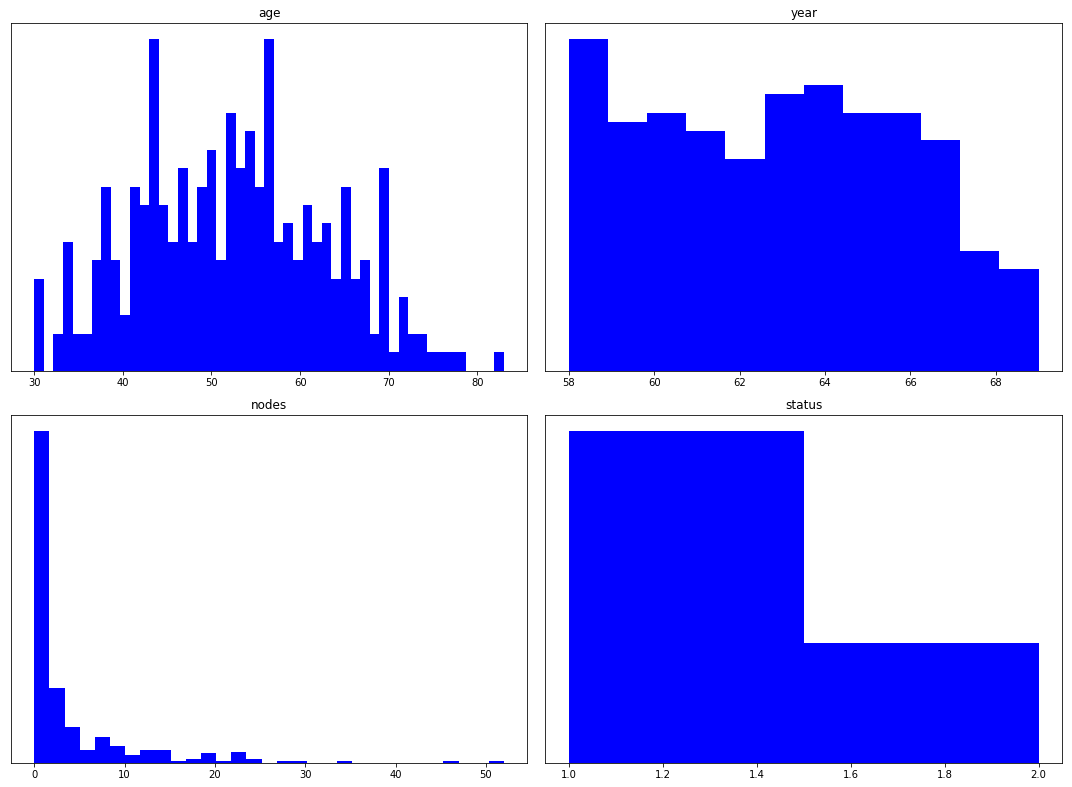

In [4]:
fig=plt.figure(figsize=(15,12))
for i in range(1,df.shape[1]+1):
    plt.subplot(2,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df.columns[i-1])
    
    vals=np.size(df.iloc[:,i-1].unique())
    plt.hist(df.iloc[:,i-1],bins=vals,color='b')
plt.tight_layout(rect=[0,0.03,1,0.95])

In [6]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
print(df['status'].value_counts(normalize=True))
print()


1    0.735294
2    0.264706
Name: status, dtype: float64



In [7]:
#let check each feature with respect to target 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(12.24989583333334, 0.5, 'distribution')

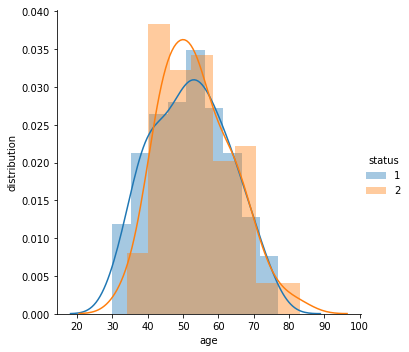

In [12]:
#age 
sns.FacetGrid(df,hue='status',size=5)\
    .map(sns.distplot,'age')\
    .add_legend()
plt.ylabel('distribution')


In [18]:
print('Median')
print('-'*50)
print(df.groupby('status')['age'].median())
print('Mean')
print('-'*50)
print(df.groupby('status')['age'].mean())

Median
--------------------------------------------------
status
1    52
2    53
Name: age, dtype: int64
Mean
--------------------------------------------------
status
1    52.017778
2    53.679012
Name: age, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(11.514218750000005, 0.5, 'distribution')

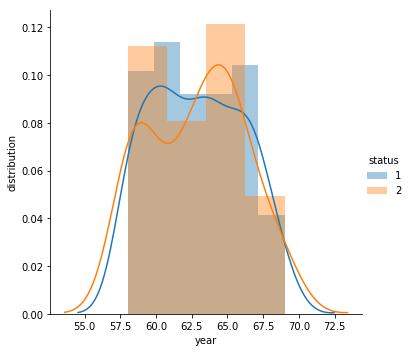

In [20]:
#year
sns.FacetGrid(df,hue='status',size=5)\
    .map(sns.distplot,'year')\
    .add_legend()
plt.ylabel('distribution')


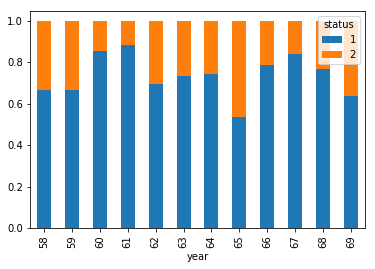

In [29]:
df.groupby('year')['status'].value_counts(normalize=True).unstack().plot.bar(stacked=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(10.763828124999996, 0.5, 'distribution')

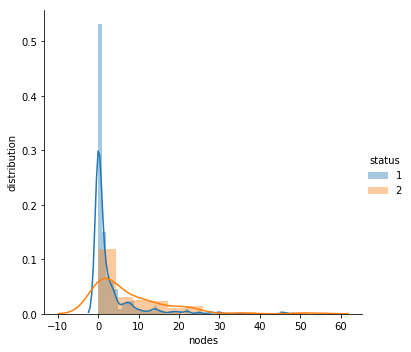

In [31]:
#year
sns.FacetGrid(df,hue='status',size=5)\
    .map(sns.distplot,'nodes')\
    .add_legend()
plt.ylabel('distribution')

In [45]:
people who belong to class1 survived morethan 5 years has more proportion zero nodes.

29.899999999999977

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


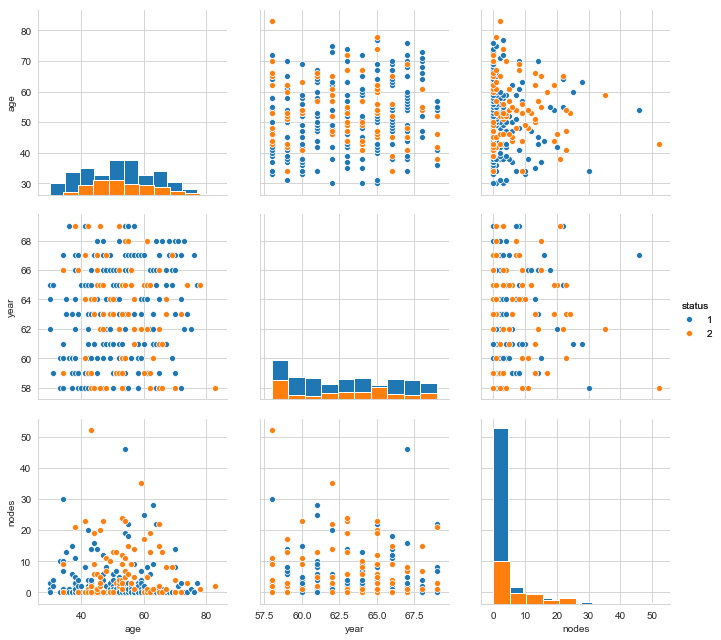

In [54]:

sns.set_style("whitegrid")
sns.pairplot(df,vars =['age','year','nodes'], hue = "status", size = 3,diag_kind='hist').add_legend();
plt.show()

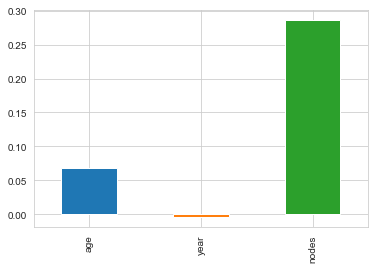

In [61]:
df[['age','year','nodes']].corrwith(df['status']).plot.bar()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


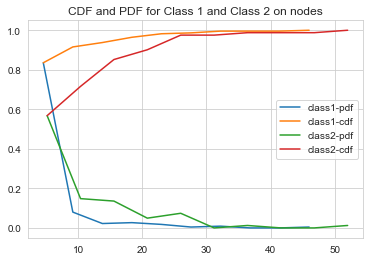

In [70]:
#pdf
df_1=df[df['status']==1]
df_2=df[df['status']==2]
counts, binedge=np.histogram(df_1['nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(binedge)
cdf = np.cumsum(pdf)
plt.plot(binedge[1:],pdf)
plt.plot(binedge[1:],cdf)

counts, binedge=np.histogram(df_2['nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(binedge)
cdf = np.cumsum(pdf)
plt.plot(binedge[1:],pdf)
plt.plot(binedge[1:],cdf)
plt.legend(['class1-pdf','class1-cdf','class2-pdf','class2-cdf']);

plt.title('CDF and PDF for Class 1 and Class 2 on nodes')
plt.show()

In [72]:
print("Quantile:")
print("Quantile values for Class 1 patients =",np.percentile(df_1['nodes'], np.arange(0,100,25)))
print("Quantile values for Class 2 patients =", np.percentile(df_2['nodes'], np.arange(0,100,25)))

#90th percentile
print("\nPercentiles:")
print("90th percentile value for Class 1 =",np.percentile(df_1['nodes'],90))
print("90th percentile value for Class 2 =",np.percentile(df_2['nodes'],90))

Quantile:
Quantile values for Class 1 patients = [0. 0. 0. 3.]
Quantile values for Class 2 patients = [ 0.  1.  4. 11.]

Percentiles:
90th percentile value for Class 1 = 8.0
90th percentile value for Class 2 = 20.0
